In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [26]:
df = pd.read_csv("USA_unemployment_rates.csv")

In [4]:
df.head(10)

Date  Population (x1000)  New Vehicle Sales ($M)  \
0  2013-05-17                 NaN                     NaN   
1  2013-04-30            315928.0                  14.867   
2  2013-03-31            315749.0                  15.206   
3  2013-02-28            315587.0                  15.323   
4  2013-01-31            315427.0                  15.222   
5  2012-12-31            315255.0                  15.325   
6  2012-11-30            315075.0                  15.482   
7  2012-10-31            314886.0                  14.232   
8  2012-09-30            314669.0                  14.879   
9  2012-08-31            314456.0                  14.462   

   Consumer Credit ($B)  New Houses Sales (x1000)  US Dollar Index  \
0                   NaN                       NaN          77.8623   
1                   NaN                     454.0          75.4857   
2             2807.4887                     444.0          76.2336   
3             2799.5228                     429.0          75.6341   
4             2780.8935                     458.0          73.4087   
5             2768.2167                     396.0          73.4362   
6             2753.8041                     398.0          73.2978   
7             2739.9632                     365.0          73.1491   
8             2723.7865                     384.0          72.7187   
9             2713.9107                     374.0          73.5926   

   Government Employees (x1000)  Personal Income ($B)  \
0                           NaN                   NaN   
1                       21844.0                   NaN   
2                       21855.0               13630.4   
3                       21871.0               13599.5   
4                       21858.0               13448.3   
5                       21874.0               13955.5   
6                       21879.0               13597.6   
7                       21888.0               13452.4   
8                       21945.0               13446.0   
9                       21925.0               13395.7   

   Avg New House Price ($)  Industrial Production Index  \
0                      NaN                          NaN   
1                 330800.0                      98.7439   
2                 286700.0                      99.2747   
3                 314400.0                      98.9583   
4                 306900.0                      98.0631   
5                 299200.0                      98.1884   
6                 290700.0                      98.1118   
7                 285400.0                      96.8409   
8                 297700.0                      96.9549   
9                 305500.0                      96.7850   

   Civilian Employment-Population ratio  Unemployment Rate  Date.year  \
0                                   NaN                NaN       2013   
1                                  58.6                7.5       2013   
2                                  58.5                7.6       2013   
3                                  58.6                7.7       2013   
4                                  58.6                7.9       2013   
5                                  58.6                7.8       2012   
6                                  58.7                7.8       2012   
7                                  58.7                7.9       2012   
8                                  58.7                7.8       2012   
9                                  58.4                8.1       2012   

   Date.month  Date.day-of-month  Date.day-of-week  
0           5                 17                 5  
1           4                 30                 2  
2           3                 31                 7  
3           2                 28                 4  
4           1                 31                 4  
5          12                 31                 1  
6          11                 30                 5  
7          10                 31                 3  
8      

In [39]:
df = df.dropna()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 2 to 448
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  447 non-null    object 
 1   Population (x1000)                    447 non-null    float64
 2   New Vehicle Sales ($M)                447 non-null    float64
 3   Consumer Credit ($B)                  447 non-null    float64
 4   New Houses Sales (x1000)              447 non-null    float64
 5   US Dollar Index                       447 non-null    float64
 6   Government Employees (x1000)          447 non-null    float64
 7   Personal Income ($B)                  447 non-null    float64
 8   Avg New House Price ($)               447 non-null    float64
 9   Industrial Production Index           447 non-null    float64
 10  Civilian Employment-Population ratio  447 non-null    float64
 11  Unemployment Rate       

In [41]:
corr_matrix = df.drop(["Date", "Date.day-of-week", "Date.day-of-month", "Date.year", "Date.month"], axis=1).corr()

<Axes: >

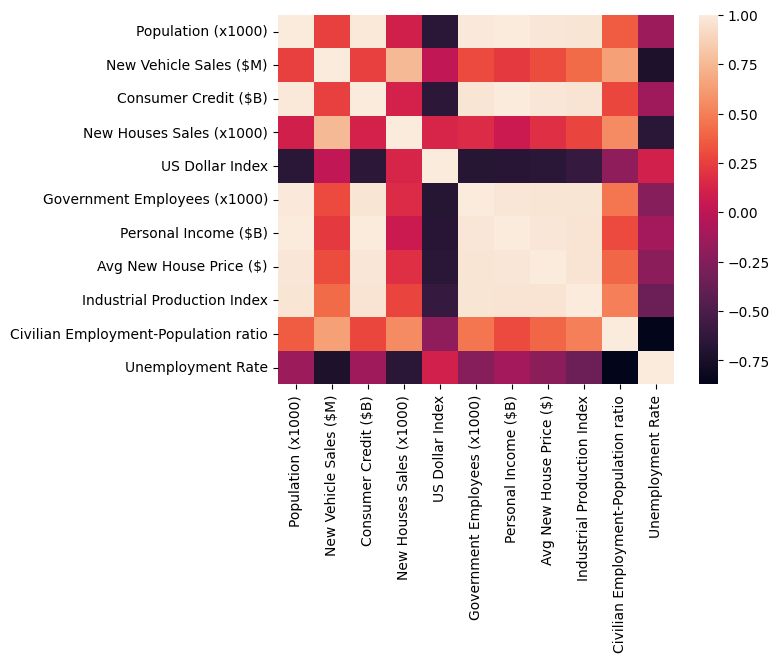

In [28]:
sns.heatmap(corr_matrix)

In [29]:
df["Personal Income ($B)"].max()

13955.5

In [10]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

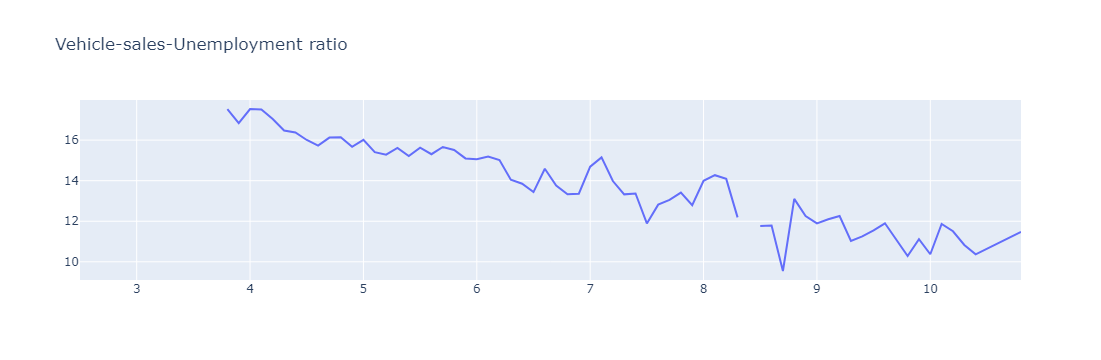

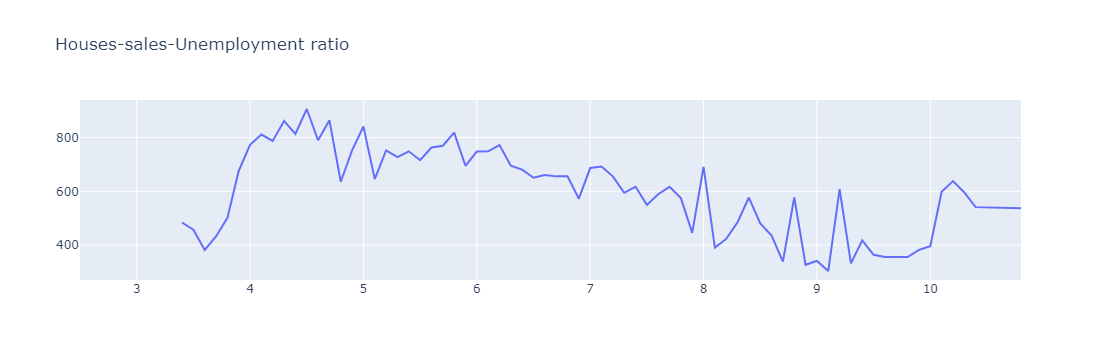

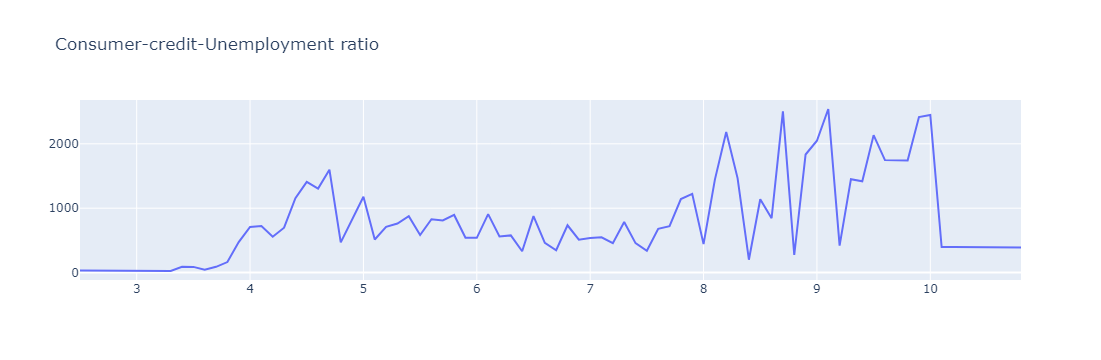

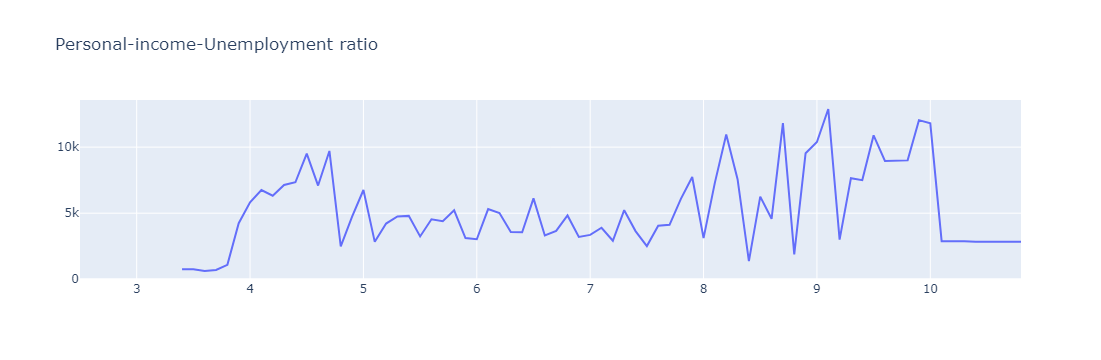

In [30]:
veh_df = df[["Unemployment Rate", "New Vehicle Sales ($M)"]]
veh_df = veh_df.groupby("Unemployment Rate").mean()
trace0 = go.Scatter(
    x=veh_df.index,
    y=veh_df["New Vehicle Sales ($M)"],
    name="Vehicle-sales-Unemployment ratio"
)
house_df = df[["Unemployment Rate", "New Houses Sales (x1000)"]]
house_df = house_df.groupby("Unemployment Rate").mean()
trace1 = go.Scatter(
    x=house_df.index,
    y=house_df["New Houses Sales (x1000)"],
    name="Houses-sales-Unemployment ratio"
)
cons_credit_df = df[["Unemployment Rate", "Consumer Credit ($B)"]]
cons_credit_df = cons_credit_df.groupby("Unemployment Rate").mean()
trace2 = go.Scatter(
    x=cons_credit_df.index,
    y=cons_credit_df["Consumer Credit ($B)"],
    name="Consumer Credit ($B)"
)
pers_inc_df = df[["Unemployment Rate", "Personal Income ($B)"]]
pers_inc_df = pers_inc_df.groupby("Unemployment Rate").mean()
trace3 = go.Scatter(
    x=pers_inc_df.index,
    y=pers_inc_df["Personal Income ($B)"],
    name="Personal Income ($B)"
)
fig0 = go.Figure(data=[trace0], layout={"title":"Vehicle-sales-Unemployment ratio"})
fig1 = go.Figure(data=[trace1], layout={"title":"Houses-sales-Unemployment ratio"})
fig2 = go.Figure(data=[trace2], layout={"title":"Consumer-credit-Unemployment ratio"})
fig3 = go.Figure(data=[trace3], layout={"title":"Personal-income-Unemployment ratio"})
iplot(fig0)
iplot(fig1)
iplot(fig2)
iplot(fig3)

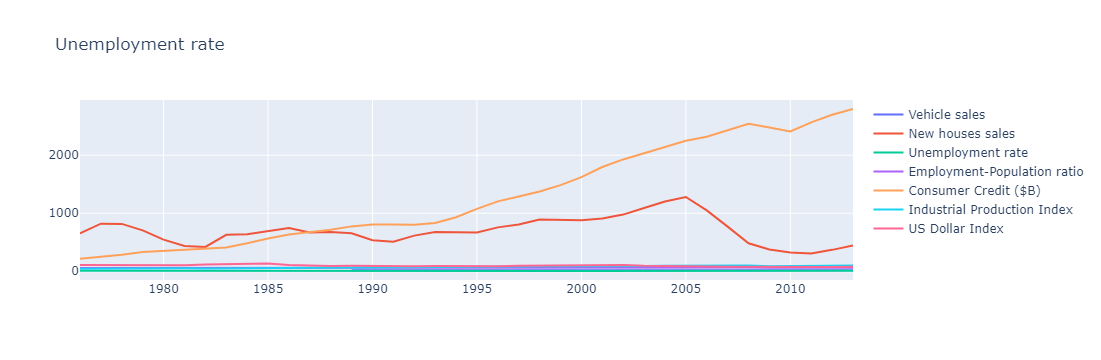

In [42]:
veh_years_df = df[["Date.year", "New Vehicle Sales ($M)"]]
veh_years_df = veh_years_df.groupby("Date.year").mean()#.sort_values(by="New Vehicle Sales ($M)", ascending=False)
trace0 = go.Scatter(
    x=veh_years_df.index,
    y=veh_df["New Vehicle Sales ($M)"],
    name="Vehicle sales"
)
house_years_df = df[["Date.year", "New Houses Sales (x1000)"]]
house_years_df = house_years_df.groupby("Date.year").mean()
trace1 = go.Scatter(
    x=house_years_df.index,
    y=house_years_df["New Houses Sales (x1000)"],
    name="New houses sales"
)
unemp_years_df = df[["Unemployment Rate", "Date.year"]]
unemp_years_df = unemp_years_df.groupby("Date.year").mean()
trace2 = go.Scatter(
    x=unemp_years_df.index,
    y=unemp_years_df["Unemployment Rate"],
    name="Unemployment rate"
)
emp_pop_years_df = df[["Civilian Employment-Population ratio", "Date.year"]]
emp_pop_years_df = emp_pop_years_df.groupby("Date.year").mean()
trace3 = go.Scatter(
    x=emp_pop_years_df.index,
    y=emp_pop_years_df["Civilian Employment-Population ratio"],
    name="Employment-Population ratio"
)
ind_prod_ind_df = df[["Date.year", "Industrial Production Index"]]
ind_prod_ind_df = ind_prod_ind_df.groupby("Date.year").mean()
trace4 = go.Scatter(
    x=ind_prod_ind_df.index,
    y=ind_prod_ind_df["Industrial Production Index"],
    name="Industrial Production Index"
)
cons_credit_df = df[["Date.year", "Consumer Credit ($B)"]]
cons_credit_df = cons_credit_df.groupby("Date.year").mean()
trace4 = go.Scatter(
    x=cons_credit_df.index,
    y=cons_credit_df["Consumer Credit ($B)"],
    name="Consumer Credit ($B)"
)
ind_prod_ind_df = df[["Date.year", "Industrial Production Index"]]
ind_prod_ind_df = ind_prod_ind_df.groupby("Date.year").mean()
trace5 = go.Scatter(
    x=ind_prod_ind_df.index,
    y=ind_prod_ind_df["Industrial Production Index"],
    name="Industrial Production Index"
)
dollar_ind_df = df[["Date.year", "US Dollar Index"]]
dollar_ind_df = dollar_ind_df.groupby("Date.year").mean()
trace6 = go.Scatter(
    x=dollar_ind_df.index,
    y=dollar_ind_df["US Dollar Index"],
    name="US Dollar Index"
)
fig = go.Figure(data=[trace0, trace1, trace2, trace3, trace4, trace5, trace6], layout={"title":"Unemployment rate"})
iplot(fig)

C:\Users\galch\AppData\Local\Temp\ipykernel_27744\3335495368.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='New Houses Sales (x1000)', ylabel='Density'>

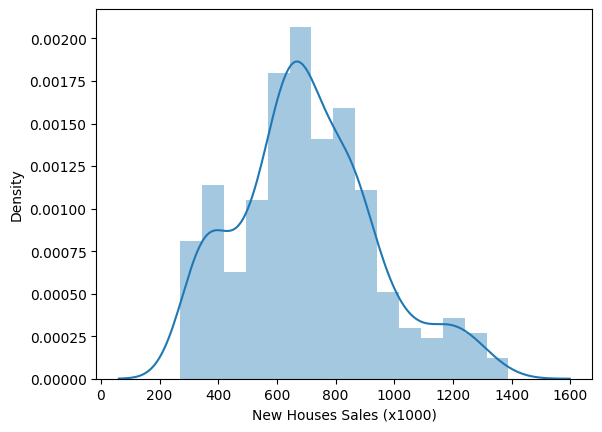

In [13]:
sns.distplot(df[""])

In [38]:
df["High Unemployment rate"] = (df["Unemployment Rate"]>5).astype("int")
df.head()

Date  Population (x1000)  New Vehicle Sales ($M)  \
0  2013-05-17                 NaN                     NaN   
1  2013-04-30            315928.0                  14.867   
2  2013-03-31            315749.0                  15.206   
3  2013-02-28            315587.0                  15.323   
4  2013-01-31            315427.0                  15.222   

   Consumer Credit ($B)  New Houses Sales (x1000)  US Dollar Index  \
0                   NaN                       NaN          77.8623   
1                   NaN                     454.0          75.4857   
2             2807.4887                     444.0          76.2336   
3             2799.5228                     429.0          75.6341   
4             2780.8935                     458.0          73.4087   

   Government Employees (x1000)  Personal Income ($B)  \
0                           NaN                   NaN   
1                       21844.0                   NaN   
2                       21855.0               13630.4   
3                       21871.0               13599.5   
4                       21858.0               13448.3   

   Avg New House Price ($)  Industrial Production Index  \
0                      NaN                          NaN   
1                 330800.0                      98.7439   
2                 286700.0                      99.2747   
3                 314400.0                      98.9583   
4                 306900.0                      98.0631   

   Civilian Employment-Population ratio  Unemployment Rate  Date.year  \
0                                   NaN                NaN       2013   
1                                  58.6                7.5       2013   
2                                  58.5                7.6       2013   
3                                  58.6                7.7       2013   
4                                  58.6                7.9       2013   

   Date.month  Date.day-of-month  Date.day-of-week  High Personal Income  \
0           5                 17                 5                     0   
1           4                 30                 2                     0   
2           3                 31                 7                     1   
3           2                 28                 4                     1   
4           1                 31                 4                     1   

   High Unemployment rate  
0                       0  
1                       1  
2                       1  
3                       1  
4                       1

C:\Users\galch\AppData\Local\Temp\ipykernel_27744\904594879.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Industrial Production Index', ylabel='Density'>

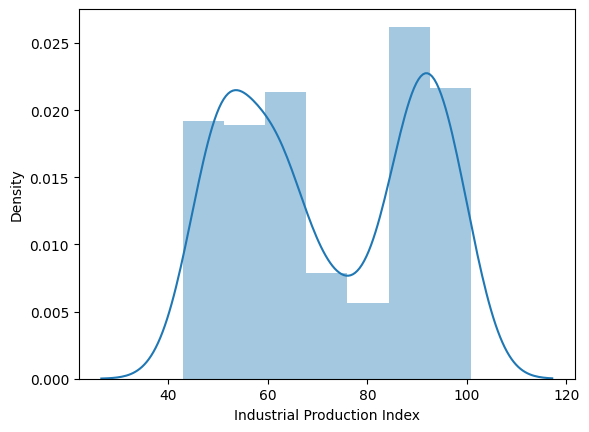

In [21]:
sns.distplot(df["Industrial Production Index"])

In [43]:
features = df.drop(["Date", "Date.day-of-week", "Date.day-of-month", "Date.year", "Date.month"], axis=1)

array([[<Axes: title={'center': 'Population (x1000)'}>,
        <Axes: title={'center': 'New Vehicle Sales ($M)'}>,
        <Axes: title={'center': 'Consumer Credit ($B)'}>],
       [<Axes: title={'center': 'New Houses Sales (x1000)'}>,
        <Axes: title={'center': 'US Dollar Index'}>,
        <Axes: title={'center': 'Government Employees (x1000)'}>],
       [<Axes: title={'center': 'Personal Income ($B)'}>,
        <Axes: title={'center': 'Avg New House Price ($)'}>,
        <Axes: title={'center': 'Industrial Production Index'}>],
       [<Axes: title={'center': 'Civilian Employment-Population ratio'}>,
        <Axes: title={'center': 'Unemployment Rate'}>,
        <Axes: title={'center': 'High Unemployment rate'}>]], dtype=object)

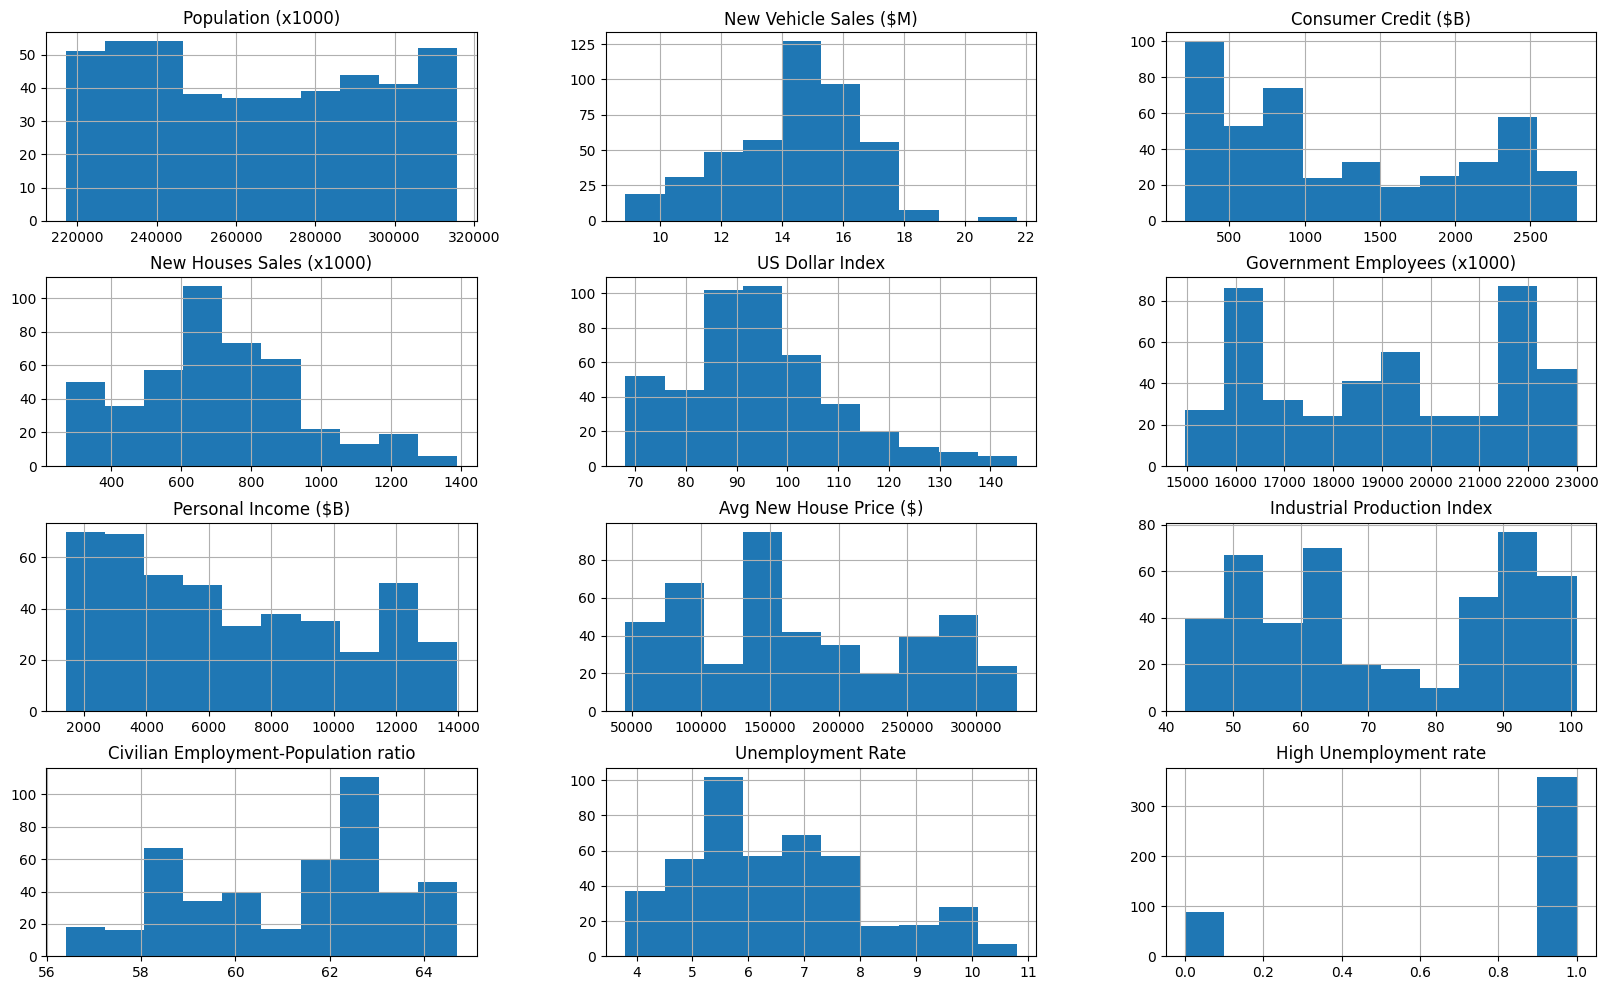

In [14]:
features.hist(figsize=(20, 12))

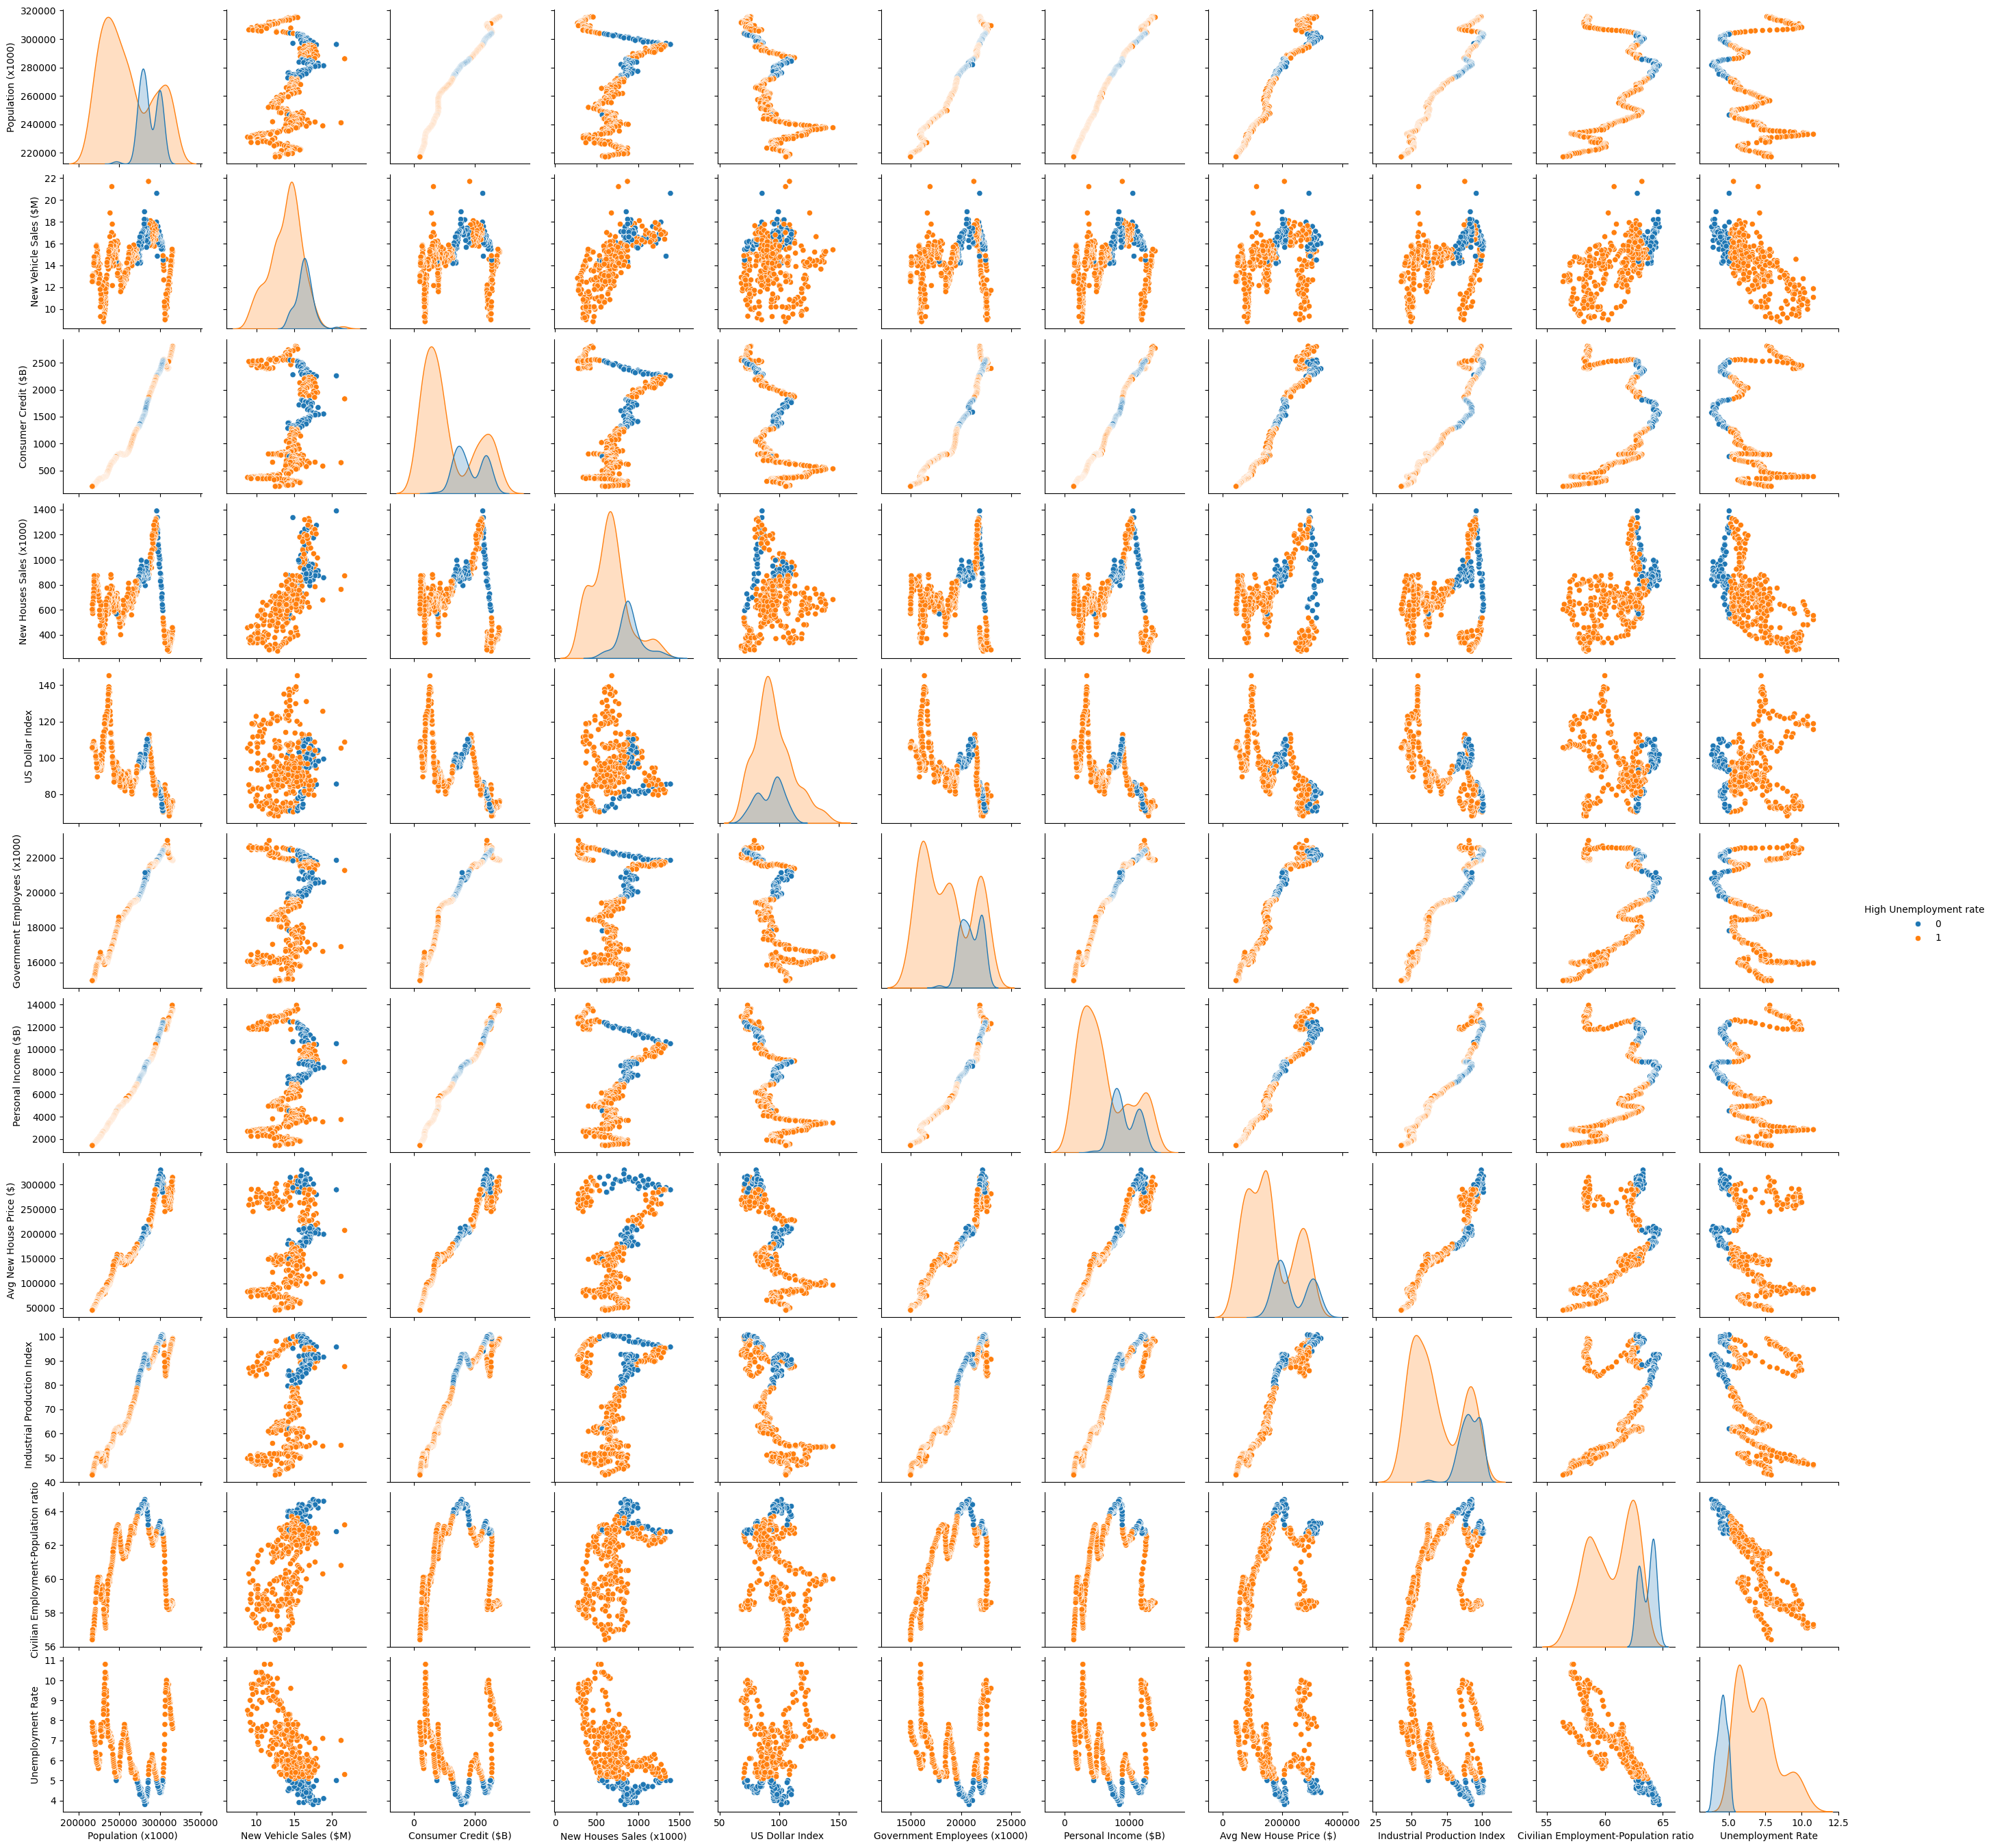

In [32]:
sns.pairplot(features, hue="High Unemployment rate")

<Axes: xlabel='High Unemployment rate', ylabel='Personal Income ($B)'>

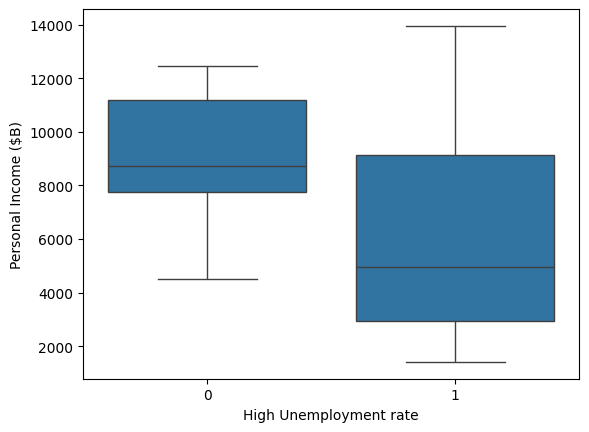

In [71]:
sns.boxplot(x="High Unemployment rate", y="Personal Income ($B)", data=features)

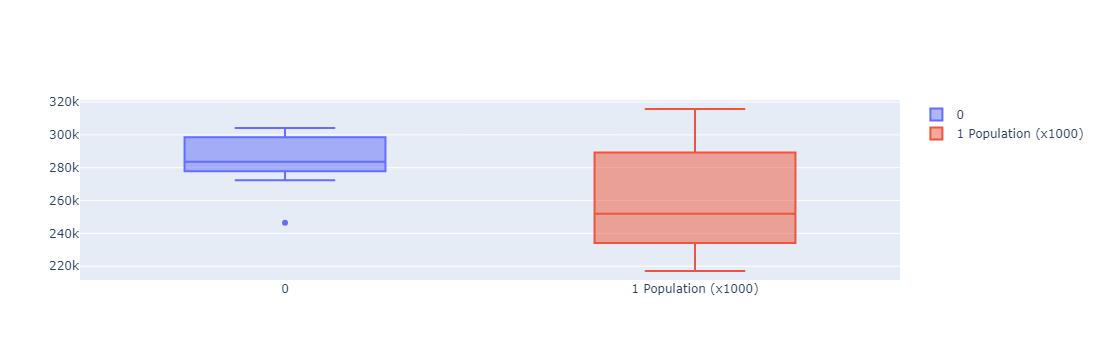

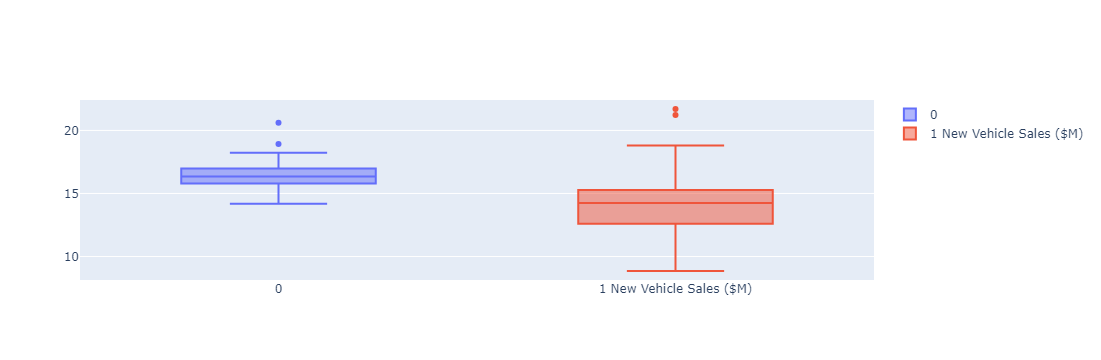

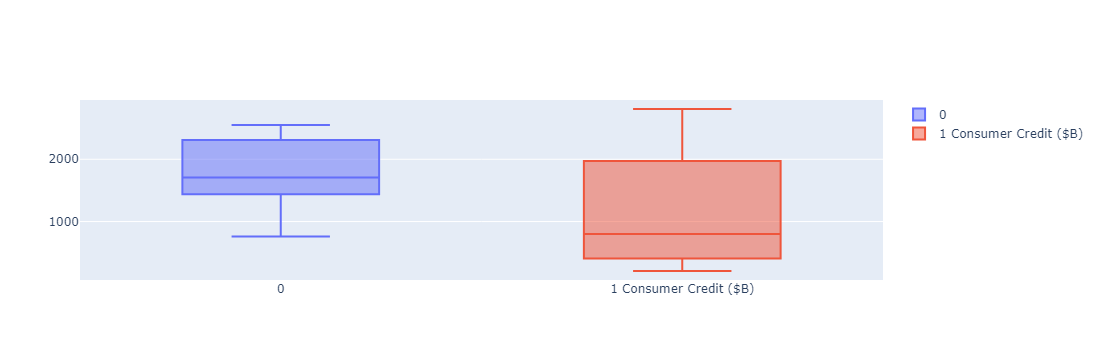

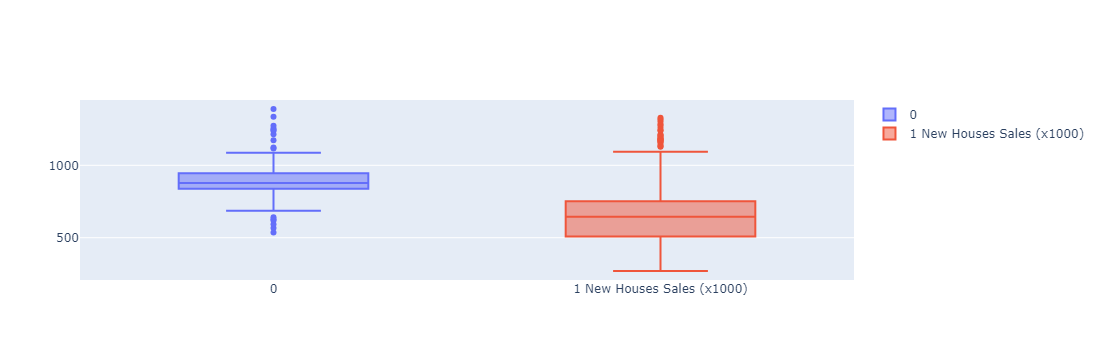

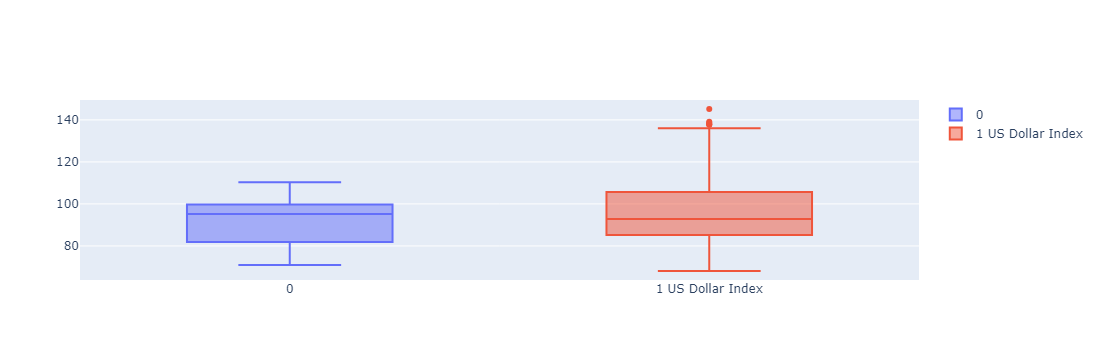

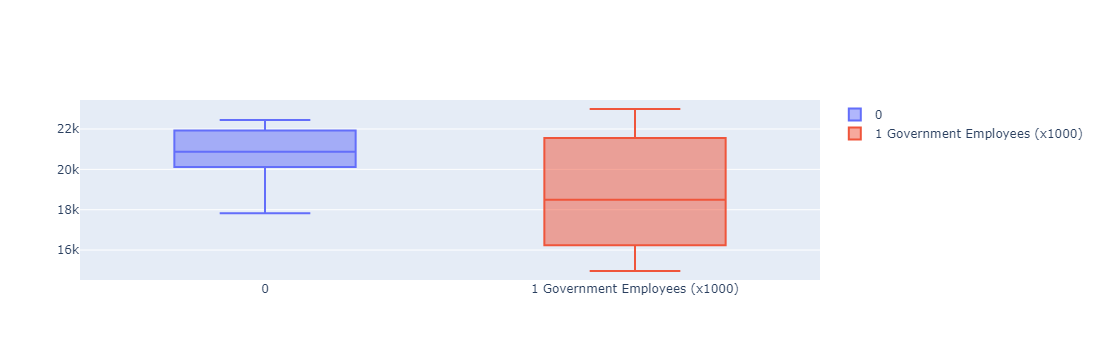

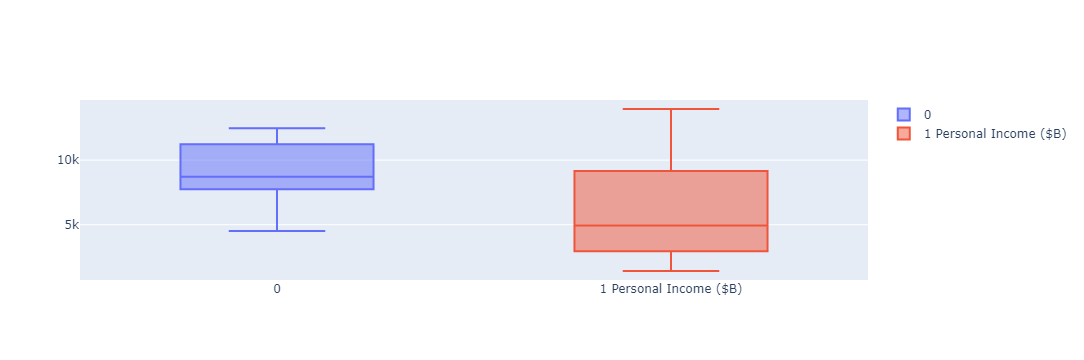

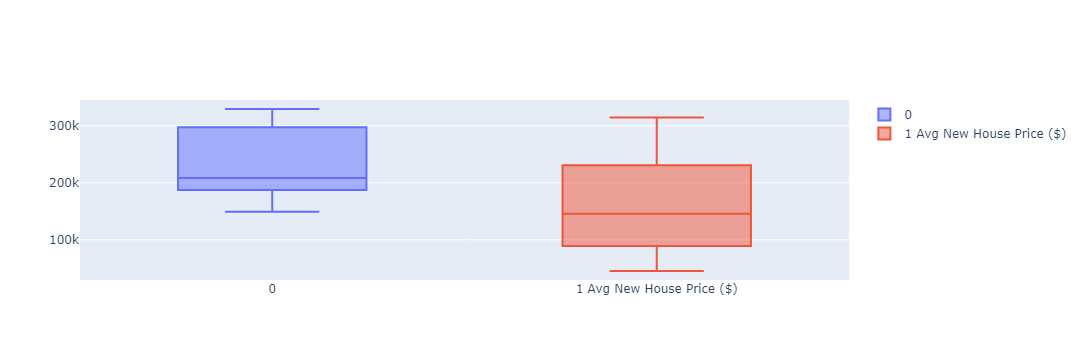

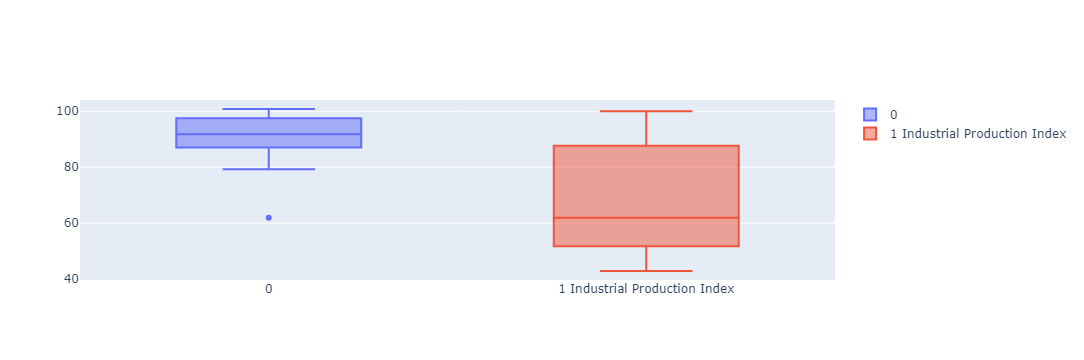

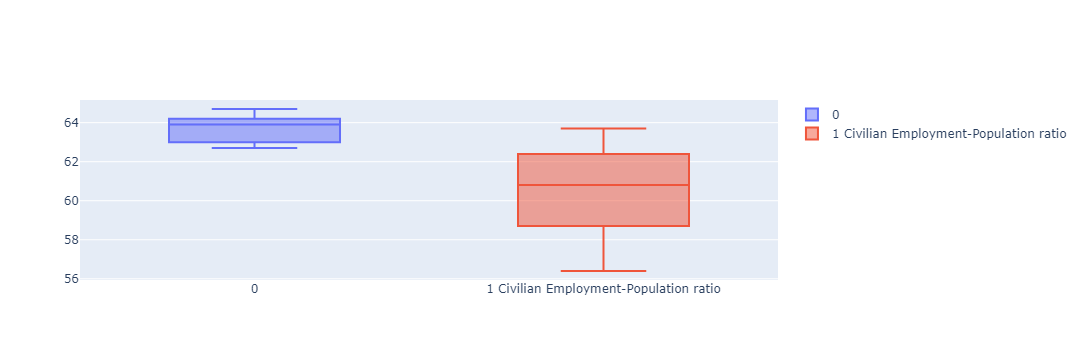

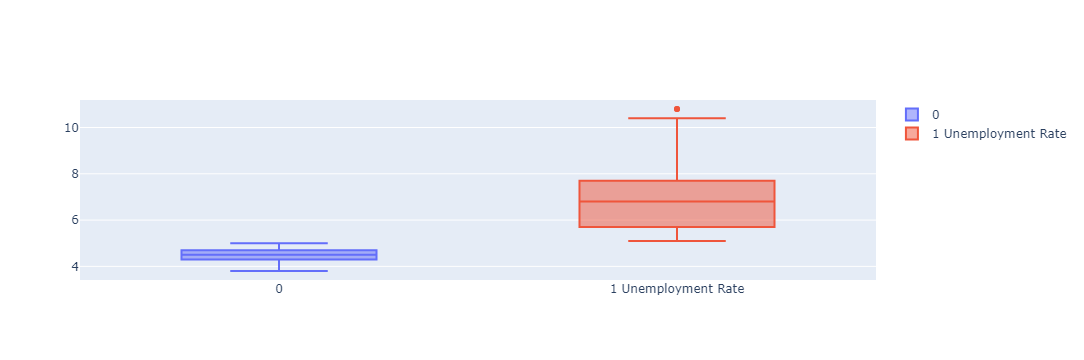

In [36]:
for col in features.drop("High Unemployment rate", axis=1):
    data = go.Box(
        y=features[features["High Unemployment rate"]==0][col],
        name= "0"
    )
    data1 = go.Box(
        y=features[features["High Unemployment rate"]==1][col],
        name= "1 " + col
    )
    iplot([data, data1], show_link=False)

In [25]:
df[df["Unemployment Rate"]==df["Unemployment Rate"].max()]["Industrial Production Index"]

Date  Population (x1000)  New Vehicle Sales ($M)  \
365  1982-12-31            233160.0                  11.073   
366  1982-11-30            232993.0                  11.866   

     Consumer Credit ($B)  New Houses Sales (x1000)  US Dollar Index  \
365              389.8487                     521.0         115.5967   
366              386.7667                     554.0         118.8069   

     Government Employees (x1000)  Personal Income ($B)  \
365                       15981.0                2848.5   
366                       15977.0                2829.6   

     Avg New House Price ($)  Industrial Production Index  \
365                  86700.0                      46.8266   
366                  87800.0                      47.1694   

     Civilian Employment-Population ratio  Unemployment Rate  Date.year  \
365                                  57.2               10.8       1982   
366                                  57.3               10.8       1982   

     Date.month  Date.day-of-month  Date.day-of-week  High Unemployment rate  
365          12                 31                 5                       1  
366          11                 30                 2                       1

In [37]:
df["High Personal Income"] = (df["Personal Income ($B)"]>df["Personal Income ($B)"].mean()).astype("int")
df.head()

Date  Population (x1000)  New Vehicle Sales ($M)  \
0  2013-05-17                 NaN                     NaN   
1  2013-04-30            315928.0                  14.867   
2  2013-03-31            315749.0                  15.206   
3  2013-02-28            315587.0                  15.323   
4  2013-01-31            315427.0                  15.222   

   Consumer Credit ($B)  New Houses Sales (x1000)  US Dollar Index  \
0                   NaN                       NaN          77.8623   
1                   NaN                     454.0          75.4857   
2             2807.4887                     444.0          76.2336   
3             2799.5228                     429.0          75.6341   
4             2780.8935                     458.0          73.4087   

   Government Employees (x1000)  Personal Income ($B)  \
0                           NaN                   NaN   
1                       21844.0                   NaN   
2                       21855.0               13630.4   
3                       21871.0               13599.5   
4                       21858.0               13448.3   

   Avg New House Price ($)  Industrial Production Index  \
0                      NaN                          NaN   
1                 330800.0                      98.7439   
2                 286700.0                      99.2747   
3                 314400.0                      98.9583   
4                 306900.0                      98.0631   

   Civilian Employment-Population ratio  Unemployment Rate  Date.year  \
0                                   NaN                NaN       2013   
1                                  58.6                7.5       2013   
2                                  58.5                7.6       2013   
3                                  58.6                7.7       2013   
4                                  58.6                7.9       2013   

   Date.month  Date.day-of-month  Date.day-of-week  High Personal Income  
0           5                 17                 5                     0  
1           4                 30                 2                     0  
2           3                 31                 7                     1  
3           2                 28                 4                     1  
4           1                 31                 4                     1

In [45]:
pd.crosstab(features["High Personal Income"], features["High Unemployment rate"], margins=True)

High Unemployment rate   0    1  All
High Personal Income                
0                        1  170  171
1                       87  189  276
All                     88  359  447